# Génération d'Images Synthétiques de Tomodensitométrie à l'aide de Réseaux Antagonistes Génératifs (GANs) pour l'Augmentation des Données en Imagerie Médicale

Lien de dataset : https://www.kaggle.com/datasets/4quant/soft-tissue-sarcoma

## Introduction

Dans le domaine de l'imagerie médicale, l'application des techniques d'apprentissage profond a montré un potentiel immense pour améliorer la précision des diagnostics, améliorer la qualité des images et faciliter le développement de nouveaux outils de diagnostic. Parmi ces techniques, les Réseaux Antagonistes Génératifs (GANs) ont émergé comme une méthode puissante pour générer des images synthétiques indiscernables des images réelles. Cette capacité est particulièrement utile en imagerie médicale, où obtenir des ensembles de données vastes et diversifiés peut être difficile en raison des préoccupations liées à la confidentialité, aux coûts élevés et à la disponibilité limitée des données annotées.

Ce notebook Jupyter vise à démontrer le processus de construction, de formation et d'évaluation d'un GAN pour générer des images synthétiques de tomodensitométrie (CT). L'ensemble de données utilisé dans ce notebook se compose de scanners CT de patients atteints de sarcomes des tissus mous des extrémités, fournis sous forme de fichiers `.h5`. Le modèle GAN sera entraîné sur cet ensemble de données pour générer des images CT synthétiques qui peuvent potentiellement être utilisées pour augmenter les ensembles de données d'entraînement pour diverses tâches d'imagerie médicale, telles que la détection, la segmentation et la classification des tumeurs.

## Description de l'Ensemble de Données

L'ensemble de données utilisé dans ce notebook contient des données d'imagerie FDG-PET/CT et IRM anatomique (pondérée T1, pondérée T2 avec suppression de la graisse) de 51 patients atteints de sarcomes des tissus mous (STSs) des extrémités, avec une confirmation histologique. Tous les patients ont passé des scanners FDG-PET/CT et IRM avant traitement entre novembre 2004 et novembre 2011. Pendant la période de suivi, 19 patients ont développé des métastases pulmonaires. Les données d'imagerie, les contours des tumeurs, les données cliniques et le code source ont été utilisés dans l'étude de Vallières et al. (2015), qui portait sur la prédiction des métastases pulmonaires dans les sarcomes des tissus mous en utilisant des modèles de radiomique dérivés des caractéristiques de texture conjointes FDG-PET et IRM.

## Objectifs

1. **Chargement et Prétraitement des Données** : Nous commencerons par charger les données de scan CT à partir des fichiers `.h5` fournis, suivis d'étapes de prétraitement pour normaliser et préparer les données pour l'entraînement.
2. **Définition de l'Architecture du GAN** : Le modèle GAN se compose de deux composants principaux : le Générateur et le Discriminateur. Le Générateur crée des images synthétiques, tandis que le Discriminateur les évalue par rapport aux images réelles. Nous définirons l'architecture de ces deux composants.
3. **Processus de Formation** : Nous mettrons en œuvre la boucle d'entraînement pour le GAN. Cela implique d'alterner entre l'entraînement du Générateur et du Discriminateur pour s'assurer que le Générateur améliore sa capacité à créer des images réalistes tandis que le Discriminateur améliore sa capacité à distinguer les images réelles des images synthétiques.
4. **Génération et Sauvegarde d'Images** : Tout au long du processus d'entraînement, nous générerons et enregistrerons des images à chaque époque pour surveiller les progrès du Générateur. De plus, nous enregistrerons l'ensemble final d'images générées pour une évaluation ultérieure.
5. **Évaluation et Analyse** : Nous évaluerons la performance du GAN en évaluant la qualité des images générées et en examinant la capacité du Discriminateur à les différencier des images réelles.
6. **Conclusions et Travaux Futurs** : Enfin, nous résumerons les résultats et discuterons des améliorations potentielles et des directions futures pour ce travail.

## Importance des Données Synthétiques en Imagerie Médicale

L'utilisation de données synthétiques en imagerie médicale présente plusieurs avantages :

- **Augmentation des Données** : Les images synthétiques peuvent être utilisées pour augmenter les ensembles de données existants, fournissant plus d'exemples pour l'entraînement des modèles d'apprentissage automatique. Cela est particulièrement utile dans les scénarios où l'obtention d'images médicales réelles est difficile ou coûteuse.
- **Préservation de la Confidentialité** : Les images synthétiques peuvent aider à résoudre les problèmes de confidentialité associés à l'utilisation de données réelles de patients, car elles ne contiennent pas d'informations identifiables.
- **Amélioration de la Robustesse des Modèles** : En entraînant des modèles sur un ensemble d'images plus diversifié, y compris des images synthétiques, nous pouvons améliorer leur robustesse et leur capacité à généraliser à différents types de données.

## Aperçu des Réseaux Antagonistes Génératifs (GANs)

Les GANs, introduits par Ian Goodfellow et ses collègues en 2014, sont une classe de réseaux neuronaux conçus pour générer de nouveaux échantillons de données qui ressemblent à un ensemble d'entraînement donné. Un GAN se compose de deux réseaux neuronaux :

- **Générateur** : Le Générateur prend un vecteur de bruit aléatoire en entrée et produit une image. L'objectif du Générateur est de créer des images indiscernables des images réelles.
- **Discriminateur** : Le Discriminateur prend une image en entrée et produit une probabilité indiquant si l'image est réelle (provenant de l'ensemble d'entraînement) ou fausse (produite par le Générateur). Le Discriminateur est entraîné pour classer correctement les images réelles et synthétiques.

Pendant l'entraînement, le Générateur et le Discriminateur sont engagés dans un jeu minimax à deux joueurs. Le Générateur vise à tromper le Discriminateur en générant des images réalistes, tandis que le Discriminateur s'efforce de reconnaître correctement les images réelles et fausses. Ce processus antagoniste continue jusqu'à ce que le Générateur produise des images très réalistes.

## Environnement de Formation et Contraintes Matérielles

Ce notebook est conçu pour être exécuté sur Google Colab, une plateforme cloud populaire qui fournit un accès gratuit aux GPU et TPU. Compte tenu des contraintes matérielles, telles qu'une limite de RAM de 12 Go, nous optimiserons le processus de formation en ajustant des paramètres comme la taille des lots et en utilisant des techniques comme le préchargement des données pour améliorer l'efficacité. De plus, nous veillerons à ce que le processus de formation soit robuste et puisse être repris en cas d'interruption.

## Résultats Attendus

À la fin de ce notebook, nous nous attendons à avoir un modèle GAN entraîné capable de générer des images CT synthétiques de haute qualité. Ces images devraient ressembler de près aux scanners CT réels de l'ensemble de données, démontrant le potentiel des GANs pour l'augmentation des données en imagerie médicale. De plus, les connaissances acquises grâce à ce projet peuvent servir de base à des recherches et développements ultérieurs dans l'application des GANs à d'autres types de données d'imagerie médicale.

---

Commençons par importer les bibliothèques nécessaires et charger l'ensemble de données.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import h5py
import numpy as np
import tensorflow as tf
from skimage.transform import resize
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import time
import os
import gc
from IPython.display import clear_output

Exploration de la structure des données

In [3]:
lowres_images_path = '/content/drive/MyDrive/Sarcomas_dataset/patient_images_lowres.h5'
petct_vox_path = '/content/drive/MyDrive/Sarcomas_dataset/lab_petct_vox_5.00mm.h5'
def print_hdf5_structure(file_path):
    """
    Recursively prints the structure of an HDF5 file, including groups and datasets.
    """
    def print_structure(name, obj):
        # Print the name of the group or dataset
        print(name)
        if isinstance(obj, h5py.Group):
            for key, value in obj.items():
                print(f"  {key}: {value}")

    with h5py.File(file_path, 'r') as f:
        f.visititems(print_structure)

print("Structure of patient_images_lowres.h5:")
print_hdf5_structure(lowres_images_path)

print("\nStructure of lab_petct_vox_5.00mm.h5:")
print_hdf5_structure(petct_vox_path)


Structure of patient_images_lowres.h5:
ct_data
  STS_002: <HDF5 dataset "STS_002": shape (134, 256, 256), type "<f4">
  STS_003: <HDF5 dataset "STS_003": shape (134, 256, 256), type "<f4">
  STS_005: <HDF5 dataset "STS_005": shape (134, 256, 256), type "<f4">
  STS_011: <HDF5 dataset "STS_011": shape (134, 256, 256), type "<f4">
  STS_012: <HDF5 dataset "STS_012": shape (134, 256, 256), type "<f4">
  STS_015: <HDF5 dataset "STS_015": shape (134, 256, 256), type "<f4">
  STS_020: <HDF5 dataset "STS_020": shape (134, 256, 256), type "<f4">
  STS_021: <HDF5 dataset "STS_021": shape (156, 256, 256), type "<f4">
  STS_022: <HDF5 dataset "STS_022": shape (134, 256, 256), type "<f4">
  STS_023: <HDF5 dataset "STS_023": shape (134, 256, 256), type "<f4">
  STS_024: <HDF5 dataset "STS_024": shape (134, 256, 256), type "<f4">
  STS_029: <HDF5 dataset "STS_029": shape (134, 256, 256), type "<f4">
  STS_031: <HDF5 dataset "STS_031": shape (129, 256, 256), type "<f4">
  STS_034: <HDF5 dataset "STS_

In [ ]:
def load_h5_data(filepath, dataset_group):
    data = []
    with h5py.File(filepath, 'r') as f:
        group = f[dataset_group]
        for name in group:
            data.append(group[name][()])
    return data

ct_data_lowres = load_h5_data('/content/drive/MyDrive/Sarcomas_dataset/patient_images_lowres.h5', 'ct_data')
ct_data_petct = load_h5_data('/content/drive/MyDrive/Sarcomas_dataset/lab_petct_vox_5.00mm.h5', 'ct_data')

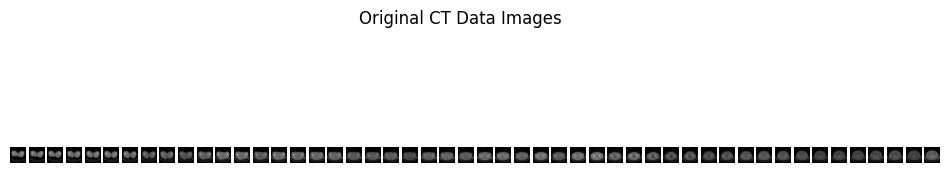

In [ ]:
num_images_to_display = 50
fig, axes = plt.subplots(1, num_images_to_display, figsize=(12, 3))

for i in range(num_images_to_display):
    image_index = i
    image = ct_slices[image_index]
    axes[i].imshow(image, cmap='gray')
    axes[i].axis('off')

plt.suptitle('Original CT Data Images')
plt.show()

In [ ]:
def normalize_data(data):
    data = (data - np.min(data)) / (np.max(data) - np.min(data))
    data = data * 2 - 1  # Normalize to [-1, 1]
    return data

def resize_data(data, target_shape=(256, 256)):
    resized_data = resize(data, target_shape, mode='constant', anti_aliasing=True)
    return resized_data

combined_ct_data = ct_data_lowres + ct_data_petct
ct_slices = []
for volume in combined_ct_data:
    normalized_volume = normalize_data(volume)
    for slice in normalized_volume:
        resized_slice = resize_data(slice, target_shape=(256, 256))
        ct_slices.append(resized_slice)

ct_slices = np.array(ct_slices)
ct_slices = np.expand_dims(ct_slices, axis=-1)  # Add channel dimension

Le modèle de générateur comprend 10 couches conçues pour convertir un vecteur de bruit de 100 dimensions en une image en niveaux de gris de 256x256. L'architecture inclut :

- **1 couche Dense** : Transforme le vecteur de bruit d'entrée en une carte de caractéristiques de 16x16x256, suivie de BatchNormalization et d'une activation LeakyReLU.
- **1 couche Reshape** : Reformate le tenseur en 16x16x256.
- **4 couches Conv2DTranspose** : Effectuent un suréchantillonnage séquentiel des cartes de caractéristiques à 32x32x128, 64x64x64, 128x128x32, et enfin à 256x256x1, chacune suivie de BatchNormalization et d'activations LeakyReLU, sauf la dernière couche, qui utilise une activation tanh pour mettre à l'échelle la sortie.
- **Sortie** : La sortie finale est une image en niveaux de gris de 256x256.

In [ ]:
def build_generator():
    model = tf.keras.Sequential()

    model.add(layers.Dense(16 * 16 * 256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((16, 16, 256)))

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(32, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))

    return model


Le modèle de discriminateur est composé de 6 couches, conçues pour distinguer les images réelles des images générées. L'architecture inclut :

- **2 couches Conv2D** : La première avec 64 filtres et la seconde avec 128 filtres, chacune ayant des noyaux de 5x5, des strides de 2x2, et une activation LeakyReLU, suivie d'un Dropout de 0,3 pour régulariser.
- **1 couche Flatten** : Aplatie les cartes de caractéristiques en un vecteur.
- **1 couche Dense** : Produit une seule sortie qui représente la probabilité qu'une image soit réelle ou générée.

In [ ]:
def build_discriminator():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[256, 256, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model


In [ ]:
generator = build_generator()
discriminator = build_discriminator()

generator.summary()
discriminator.summary()

# GAN Loss Functions
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

# Optimizers
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 65536)             6553600   
                                                                 
 batch_normalization (Batch  (None, 65536)             262144    
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 65536)             0         
                                                                 
 reshape (Reshape)           (None, 16, 16, 256)       0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 32, 32, 128)       819200    
 anspose)                                                        
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 128)       5

Le script de formation optimise un modèle GAN en suivant un processus itératif de 30 époques, en surveillant les pertes du discriminateur et du générateur à chaque étape. Après chaque époque, les modèles sont évalués et les meilleurs modèles sont sauvegardés si les pertes moyennes sont inférieures aux précédentes. Les modèles de générateur et de discriminateur sont enregistrés dans un répertoire dédié lorsqu'ils atteignent leurs meilleures performances. De plus, des images synthétiques sont générées et sauvegardées après chaque époque pour visualiser les progrès. La fonction utilise efficacement le RAM et la VRAM disponibles pour maximiser l'efficacité du processus de formation.


In [ ]:
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, 100])
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)
        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)
        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return disc_loss, gen_loss

# Training Function with Time Tracking and Loss Ratio
def train(dataset, epochs):
    epoch_logs = []  # List to keep track of epoch logs
    best_gen_loss = float('inf')  # Initialize best generator loss
    best_disc_loss = float('inf')  # Initialize best discriminator loss
    checkpoint_dir = './training_checkpoints'
    os.makedirs(checkpoint_dir, exist_ok=True)

    for epoch in range(epochs):
        start_time = time.time()  # Start time tracking for the epoch
        disc_losses = []
        gen_losses = []

        for image_batch in dataset:
            d_loss, g_loss = train_step(image_batch)
            disc_losses.append(d_loss)
            gen_losses.append(g_loss)

        # End time tracking for the epoch
        end_time = time.time()
        # Calculate the duration for the epoch
        duration = end_time - start_time

        # Calculate the average losses and their ratio
        d_loss_avg = sum(disc_losses) / len(disc_losses)
        g_loss_avg = sum(gen_losses) / len(gen_losses)
        log_message = (f"Epoch [{epoch+1}/{epochs}]: Discriminator Loss: {d_loss_avg:.4f}, "
                       f"Generator Loss: {g_loss_avg:.4f}, Ratio: {d_loss_avg/g_loss_avg:.4f}, "
                       f"Time: {duration:.2f} sec")

        epoch_logs.append(log_message)

        # Check if the current model is the best so far
        if g_loss_avg < best_gen_loss or d_loss_avg < best_disc_loss:
            if g_loss_avg < best_gen_loss:
                best_gen_loss = g_loss_avg
            if d_loss_avg < best_disc_loss:
                best_disc_loss = d_loss_avg
            # Save the models
            generator.save(os.path.join(checkpoint_dir, 'generator_best.h5'))
            discriminator.save(os.path.join(checkpoint_dir, 'discriminator_best.h5'))

        # Produce images for the GIF
        generate_and_save_images(generator, epoch + 1, seed)

        # Print all epoch logs
        clear_output(wait=True)
        for log in epoch_logs:
            print(log)

    # Final image after the last epoch
    generate_and_save_images(generator, epochs, seed)
    print("Training complete. Best models saved.")

# Generate and Save Images
def generate_and_save_images(model, epoch, test_input):
    predictions = model(test_input, training=False)
    fig = plt.figure(figsize=(4, 4))

    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i + 1)
        plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
        plt.axis('off')

    plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
    plt.show()

In [ ]:
# Prepare the Dataset with Prefetching
BUFFER_SIZE = len(ct_slices)
BATCH_SIZE = 128  # Reduce the batch size

train_dataset = tf.data.Dataset.from_tensor_slices(ct_slices).shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

Epoch [1/30]: Discriminator Loss: 1.0304, Generator Loss: 1.2160, Ratio: 0.8474, Time: 30.87 sec
Epoch [2/30]: Discriminator Loss: 0.9833, Generator Loss: 1.2861, Ratio: 0.7646, Time: 27.37 sec
Epoch [3/30]: Discriminator Loss: 0.8742, Generator Loss: 1.1405, Ratio: 0.7665, Time: 27.26 sec
Epoch [4/30]: Discriminator Loss: 0.9285, Generator Loss: 1.1098, Ratio: 0.8366, Time: 27.78 sec
Epoch [5/30]: Discriminator Loss: 1.2162, Generator Loss: 0.9481, Ratio: 1.2827, Time: 27.63 sec
Epoch [6/30]: Discriminator Loss: 1.2747, Generator Loss: 0.8852, Ratio: 1.4400, Time: 27.42 sec
Epoch [7/30]: Discriminator Loss: 1.1815, Generator Loss: 0.9240, Ratio: 1.2788, Time: 27.48 sec
Epoch [8/30]: Discriminator Loss: 1.4866, Generator Loss: 0.8087, Ratio: 1.8383, Time: 27.57 sec
Epoch [9/30]: Discriminator Loss: 0.9434, Generator Loss: 1.1864, Ratio: 0.7951, Time: 27.57 sec
Epoch [10/30]: Discriminator Loss: 1.4763, Generator Loss: 0.8270, Ratio: 1.7852, Time: 27.55 sec
Epoch [11/30]: Discriminator 

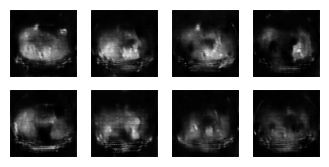

Training complete. Best models saved.


In [ ]:
# Training Parameters
EPOCHS = 30
noise_dim = 100
num_examples_to_generate = 8

# Seed for consistent image generation
seed = tf.random.normal([num_examples_to_generate, noise_dim])
tf.keras.mixed_precision.set_global_policy('mixed_float16')

# Start Training
train(train_dataset, EPOCHS)

### Conclusion des Résultats Obtenus

Les résultats des 30 époques de formation montrent une convergence progressive des pertes du discriminateur et du générateur. Au début, la perte du générateur est élevée et la perte du discriminateur est relativement faible, indiquant que le générateur a du mal à créer des images réalistes. Au fil des époques, la perte du générateur diminue tandis que celle du discriminateur augmente, jusqu'à atteindre un équilibre où les deux pertes sont proches. Les images générées montrent une amélioration notable en termes de réalisme visuel au cours des époques. Cette progression indique que le modèle GAN est capable d'apprendre et de générer des images médicales synthétiques de manière efficace, tout en maintenant un bon équilibre entre le générateur et le discriminateur. La réduction des pertes et le temps de formation relativement stable montrent que le modèle est bien optimisé pour les ressources disponibles, exploitant efficacement la mémoire RAM et la VRAM.


### Utilité et Cas d'Utilisation des Images Produites

Les images générées par le GAN ont de nombreuses applications précieuses dans le domaine médical. Elles peuvent être utilisées pour augmenter les ensembles de données d'entraînement, améliorant ainsi la performance des modèles d'apprentissage automatique pour des tâches comme la détection, la segmentation et la classification des tumeurs. De plus, ces images synthétiques aident à préserver la confidentialité des patients en fournissant des données réalistes sans compromettre les informations personnelles. Elles sont également utiles pour la recherche et le développement de nouveaux algorithmes de traitement d'images, offrant une ressource abondante et variée pour tester et valider de nouvelles techniques. En résumé, les images produites par les GANs jouent un rôle crucial dans l'avancement des technologies d'imagerie médicale tout en surmontant les défis liés à l'accès aux données réelles.


## Remerciements

Nous remercions l'Unité de Physique Médicale de l'Université McGill pour avoir fourni l'ensemble de données utilisé dans ce notebook.
Nous souhaitons aussi exprimer notre profonde gratitude au Pr. Hajji Tarik, enseignant à l'Université Privée de Fès, pour son soutien et son encadrement tout au long de cette formation.